# NFL Players Draft Position vs Career AV, by Position

In [269]:
import os
import requests
import re
import csv
import json
import time
import html
import string
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from geojson import Feature, FeatureCollection, Point

In [27]:
players = []
with open("player-url-raw.txt") as f:
    for line in f:
        count = 0
        match = re.findall('<a href="([^"]*)', line)
        if(match and len(match) > 30):
            players = match

In [38]:
letters = list(string.ascii_uppercase)
players = []
time_start = time.perf_counter()
time_elapsed = 0

for num in range(len(letters)):
    URL = 'https://www.pro-football-reference.com/players/' + letters[num] + '/'
    data = requests.get(URL, stream=True)
    for line in data.iter_lines():
        match = re.findall('<a href="([^"]*)', str(line))
        if(match and len(match) > 30):
            players.append(match)
            print("Successfully retrieved players from letter " + letters[num])

Successfully retrieved players from letter A
Successfully retrieved players from letter B
Successfully retrieved players from letter C
Successfully retrieved players from letter D
Successfully retrieved players from letter E
Successfully retrieved players from letter F
Successfully retrieved players from letter G
Successfully retrieved players from letter H
Successfully retrieved players from letter I
Successfully retrieved players from letter J
Successfully retrieved players from letter K
Successfully retrieved players from letter L
Successfully retrieved players from letter M
Successfully retrieved players from letter N
Successfully retrieved players from letter O
Successfully retrieved players from letter P
Successfully retrieved players from letter Q
Successfully retrieved players from letter R
Successfully retrieved players from letter S
Successfully retrieved players from letter T
Successfully retrieved players from letter U
Successfully retrieved players from letter V
Successful

In [46]:
flatten = itertools.chain.from_iterable
players_flat = list(flatten(players))

In [88]:
letters = list(string.ascii_uppercase)
time_start = time.perf_counter()
time_elapsed = 0
av = []
draft = []
position = []

for num in range(len(players_flat)):
    URL = 'https://www.pro-football-reference.com' + players_flat[num]
    data = requests.get(URL, stream=True)
    
    av_val = -1
    draft_val = -1
    position_val = "null"
    
    if (data.status_code == 200):
        for line in data.iter_lines():
            line = str(line)[2:]

            match_av = re.search("Weighted Career AV \(100-95-...\)</a>:</strong> (\d*)", line)
            if (match_av):
                av_val = match_av.group(1)

            match_draft = re.search("in the [\d]nd round \((\d*)", line)
            if (match_draft):
                draft_val = match_draft.group(1)

            match_position = re.search("Position</strong>: ([A-Z]*)", line)
            if (match_position):
                position_val = match_position.group(1)
    else:
        print("could not access page " + URL + " at index " + str(num))
            
    av.append(av_val)
    draft.append(draft_val)
    position.append(position_val)
    
    time_elapsed = time.perf_counter() - time_start
    if((num + 1) % 100 == 0):
        print("\n", num + 1, "players processed.", int(((num + 1) / len(players_flat)) * 100), "% done")
        print(int(time_elapsed), "seconds elapsed.")
        eta = int((time_elapsed / num + 1) * (len(players_flat) - num + 1))
        if(eta > 59):
            eta_min = int(eta / 60)
            eta_sec = int(eta % eta_min)
            print("ETA:", eta_min, "minutes and", eta_sec, "seconds.")
        else:
            print("ETA:", eta, "seconds.")



 100 players processed. 0 % done
41 seconds elapsed.
ETA: 629 minutes and 25 seconds.

 200 players processed. 0 % done
89 seconds elapsed.
ETA: 639 minutes and 7 seconds.

 300 players processed. 1 % done
127 seconds elapsed.
ETA: 627 minutes and 32 seconds.

 400 players processed. 1 % done
166 seconds elapsed.
ETA: 620 minutes and 25 seconds.

 500 players processed. 1 % done
212 seconds elapsed.
ETA: 621 minutes and 52 seconds.

 600 players processed. 2 % done
252 seconds elapsed.
ETA: 618 minutes and 20 seconds.

 700 players processed. 2 % done
294 seconds elapsed.
ETA: 615 minutes and 21 seconds.

 800 players processed. 2 % done
333 seconds elapsed.
ETA: 611 minutes and 43 seconds.

 900 players processed. 3 % done
380 seconds elapsed.
ETA: 611 minutes and 30 seconds.

 1000 players processed. 3 % done
416 seconds elapsed.
ETA: 606 minutes and 32 seconds.

 1100 players processed. 4 % done
460 seconds elapsed.
ETA: 604 minutes and 58 seconds.

 1200 players processed. 4 % don


 9200 players processed. 34 % done
3801 seconds elapsed.
ETA: 411 minutes and 48 seconds.

 9300 players processed. 34 % done
3838 seconds elapsed.
ETA: 409 minutes and 20 seconds.

 9400 players processed. 35 % done
3886 seconds elapsed.
ETA: 407 minutes and 10 seconds.

 9500 players processed. 35 % done
3927 seconds elapsed.
ETA: 404 minutes and 49 seconds.

 9600 players processed. 35 % done
3964 seconds elapsed.
ETA: 402 minutes and 19 seconds.

 9700 players processed. 36 % done
4007 seconds elapsed.
ETA: 400 minutes and 1 seconds.

 9800 players processed. 36 % done
4046 seconds elapsed.
ETA: 397 minutes and 36 seconds.

 9900 players processed. 37 % done
4087 seconds elapsed.
ETA: 395 minutes and 14 seconds.

 10000 players processed. 37 % done
4126 seconds elapsed.
ETA: 392 minutes and 49 seconds.

 10100 players processed. 37 % done
4171 seconds elapsed.
ETA: 390 minutes and 33 seconds.

 10200 players processed. 38 % done
4209 seconds elapsed.
ETA: 388 minutes and 8 seconds


 18100 players processed. 67 % done
7241 seconds elapsed.
ETA: 200 minutes and 18 seconds.

 18200 players processed. 68 % done
7276 seconds elapsed.
ETA: 197 minutes and 56 seconds.

 18300 players processed. 68 % done
7312 seconds elapsed.
ETA: 195 minutes and 34 seconds.

 18400 players processed. 68 % done
7348 seconds elapsed.
ETA: 193 minutes and 12 seconds.

 18500 players processed. 69 % done
7384 seconds elapsed.
ETA: 190 minutes and 50 seconds.

 18600 players processed. 69 % done
7420 seconds elapsed.
ETA: 188 minutes and 29 seconds.

 18700 players processed. 70 % done
7457 seconds elapsed.
ETA: 186 minutes and 8 seconds.

 18800 players processed. 70 % done
7493 seconds elapsed.
ETA: 183 minutes and 46 seconds.

 18900 players processed. 70 % done
7534 seconds elapsed.
ETA: 181 minutes and 27 seconds.

 19000 players processed. 71 % done
7569 seconds elapsed.
ETA: 179 minutes and 5 seconds.

 19100 players processed. 71 % done
7604 seconds elapsed.
ETA: 176 minutes and 43

In [170]:
time_start = time.perf_counter()
time_elapsed = 0
years = []
change_count = 0

for num in range(len(players_formatted_filtered)):
    URL = 'https://www.pro-football-reference.com' + players_formatted_filtered[num][0]
    data = requests.get(URL, stream=True)

    year = -1

    if (data.status_code == 200):
        for line in data.iter_lines():
            line = str(line)[2:]

#                 match_draft = re.search("in the [\d][ndthsr]+ round \((\d*)", line)
            match_year = re.search(">(\d+) NFL Draft<", line)
            if (match_year):
                year = int(match_year.group(1))
                change_count += 1
    else:
        print("could not access page " + URL + " at index " + str(num))

    if (year == -1):
        print("could not access year " + URL + " at index " + str(num))
        
    years.append(year)
            
    time_elapsed = time.perf_counter() - time_start
    if((num + 1) % 100 == 0):
        print("\n", change_count, "players processed.", int(((num + 1) / len(players_formatted_filtered)) * 100), "% done")
        print(int(time_elapsed), "seconds elapsed.")
        eta = int((time_elapsed / num + 1) * (len(players_formatted_filtered) - num + 1))
        if(eta > 59):
            eta_min = int(eta / 60)
            eta_sec = int(eta % eta_min)
            print("ETA:", eta_min, "minutes and", eta_sec, "seconds.")
        else:
            print("ETA:", eta, "seconds.")


could not access year https://www.pro-football-reference.com/players/A/AdicMa20.htm at index 61

 99 players processed. 0 % done
18 seconds elapsed.
ETA: 241 minutes and 37 seconds.

 199 players processed. 1 % done
47 seconds elapsed.
ETA: 250 minutes and 57 seconds.

 299 players processed. 2 % done
89 seconds elapsed.
ETA: 260 minutes and 41 seconds.

 399 players processed. 3 % done
122 seconds elapsed.
ETA: 259 minutes and 55 seconds.
could not access year https://www.pro-football-reference.com/players/B/BanaPe00.htm at index 489

 498 players processed. 4 % done
161 seconds elapsed.
ETA: 261 minutes and 13 seconds.

 598 players processed. 4 % done
195 seconds elapsed.
ETA: 259 minutes and 30 seconds.

 698 players processed. 5 % done
230 seconds elapsed.
ETA: 257 minutes and 49 seconds.
could not access year https://www.pro-football-reference.com/players/B/BensDa20.htm at index 785
could not access year https://www.pro-football-reference.com/players/B/BentAl00.htm at index 789



could not access year https://www.pro-football-reference.com/players/H/HollTo00.htm at index 4994

 4962 players processed. 40 % done
1623 seconds elapsed.
ETA: 162 minutes and 2 seconds.
could not access year https://www.pro-football-reference.com/players/H/HopkJe20.htm at index 5059

 5061 players processed. 41 % done
1653 seconds elapsed.
ETA: 159 minutes and 46 seconds.
could not access year https://www.pro-football-reference.com/players/H/HowaDa22.htm at index 5106
could not access year https://www.pro-football-reference.com/players/H/HudsDi00.htm at index 5149
could not access year https://www.pro-football-reference.com/players/H/HudsGo00.htm at index 5151
could not access year https://www.pro-football-reference.com/players/H/HumpBo00.htm at index 5190

 5157 players processed. 42 % done
1684 seconds elapsed.
ETA: 157 minutes and 31 seconds.
could not access year https://www.pro-football-reference.com/players/H/HuntAl00.htm at index 5216

 5256 players processed. 42 % done
1712 s

could not access year https://www.pro-football-reference.com/players/R/RuetMi20.htm at index 9443

 9420 players processed. 77 % done
3058 seconds elapsed.
ETA: 62 minutes and 33 seconds.
could not access year https://www.pro-football-reference.com/players/S/SancLu20.htm at index 9530
could not access year https://www.pro-football-reference.com/players/S/SandRi00.htm at index 9553
could not access year https://www.pro-football-reference.com/players/S/SatcDo20.htm at index 9580

 9517 players processed. 77 % done
3087 seconds elapsed.
ETA: 60 minutes and 20 seconds.
could not access year https://www.pro-football-reference.com/players/S/ScarBo00.htm at index 9611
could not access year https://www.pro-football-reference.com/players/S/SchuHa00.htm at index 9657

 9615 players processed. 78 % done
3119 seconds elapsed.
ETA: 58 minutes and 7 seconds.
could not access year https://www.pro-football-reference.com/players/S/SeurFr00.htm at index 9777

 9714 players processed. 79 % done
3153 seco

In [186]:
fields = ['url', 'approximate_value', 'number_drafted', 'position', 'year_drafted']
with open('players.csv', 'w') as f: 
      
    write = csv.writer(f) 
      
    write.writerow(fields) 
    write.writerows(players_formatted_filtered_years)

In [232]:
players_joined.to_csv('players_joined.csv')

In [183]:
players_formatted_filtered_years = []

for num in range(len(players_formatted_filtered)):
    if (years[num] != -1):
        players_formatted_filtered_years.append([players_formatted_filtered[num][0], 
                                                 players_formatted_filtered[num][1], 
                                                 players_formatted_filtered[num][2], 
                                                 players_formatted_filtered[num][3], 
                                                 years[num]])


In [187]:
players_df = pd.read_csv('players.csv')

In [206]:
players_df_grouped = players_df.groupby(['position', 'year_drafted']).count().sort_values(['approximate_value'], ascending=False)

In [208]:
players_df_grouped = players_df.groupby(['position', 'year_drafted'])
counts = players_df_grouped.size().to_frame(name='counts')

In [215]:
players_joined = counts.join(players_df_grouped.mean()).rename(columns={'approximate_value': 'av_mean', 'number_drafted': 'draft_mean'}).reset_index()

In [227]:
players_joined_filtered = players_joined[players_joined['counts'] > 10]

In [229]:
players_joined_filtered.sort_values(['av_mean'], ascending=False)

,position,year_drafted,counts,av_mean,draft_mean
86,DB,1960,12,42.666667,48.333333
870,QB,2004,12,41.583333,122.416667
1066,T,1968,14,40.000000,66.500000
541,LB,1981,16,39.750000,98.062500
242,DT,1975,11,38.363636,66.545455
...,...,...,...,...,...
576,LB,2020,30,2.300000,128.233333
76,CB,2020,25,2.280000,112.800000
215,DL,2020,35,2.228571,119.000000
1033,S,2020,21,2.142857,139.000000


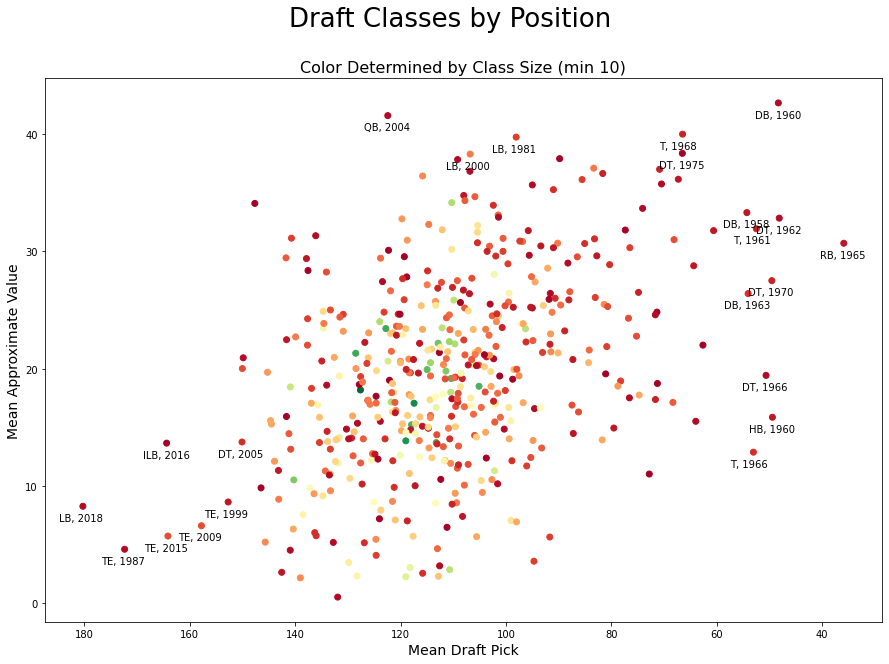

In [412]:
plot = plt.scatter(players_joined_filtered['draft_mean'], 
                   players_joined_filtered['av_mean'],
                   c = players_joined_filtered['counts'],
                   norm = mpl.colors.Normalize(min(players_joined_filtered['counts']),
                                               max(players_joined_filtered['counts'])),
                   cmap = 'RdYlGn')

ax = plt.gca()
ax.invert_xaxis()

annotations = players_joined_filtered['position'] + ", " + players_joined_filtered['year_drafted'].map(str)
annotations = annotations.tolist()

plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel("Mean Draft Pick", fontsize = 14)
plt.ylabel("Mean Approximate Value", fontsize = 14)
plt.suptitle("Draft Classes by Position", fontsize = 26)
plt.title("Color Determined by Class Size (min 10)", fontsize = 16)

for num, row in players_joined_filtered.iterrows():
    if ((row['draft_mean'] > 150 and row['av_mean'] < 20) or
       (row['draft_mean'] < 60 or row['av_mean'] > 38)):
        ax.annotate((row['position'] + ", " + str(row['year_drafted'])), 
                    (row['draft_mean'], row['av_mean']),
                    (row['draft_mean'] + 4.5, row['av_mean'] - 1.25))

plt.savefig('draftclasses.png')

In [343]:
players_df['year_quantile'] = pd.qcut(players_df['year_drafted'], q=4)

In [348]:
players_joined_binned = players_joined.groupby(['year_quantile', 'position']).mean()

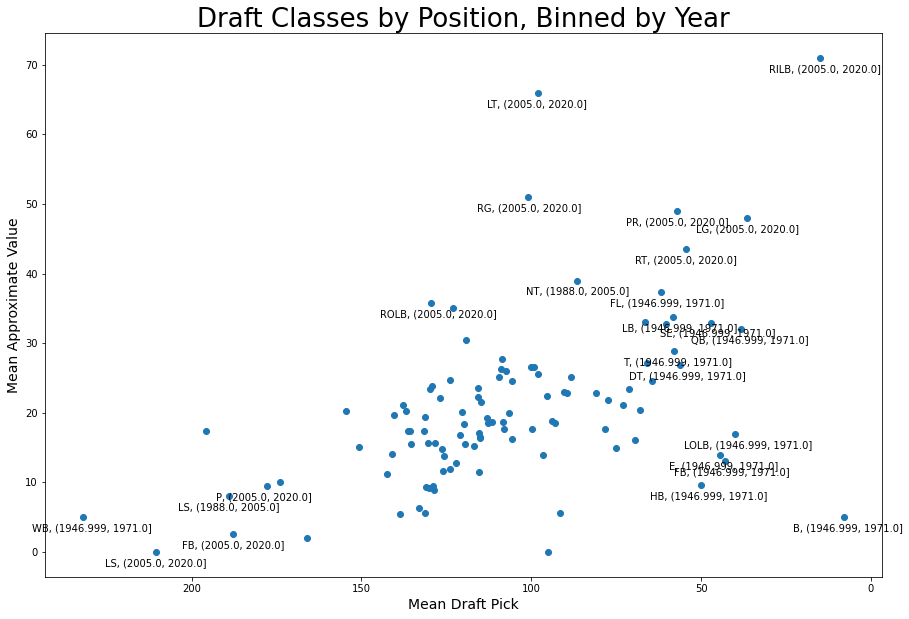

In [441]:
plot = plt.scatter(players_joined_binned['draft_mean'], 
                   players_joined_binned['av_mean'])

ax = plt.gca()
ax.invert_xaxis()

plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel("Mean Draft Pick", fontsize = 14)
plt.ylabel("Mean Approximate Value", fontsize = 14)
plt.title("Draft Classes by Position, Binned by Year", fontsize = 26)

for num, row in players_joined_binned.iterrows():
    if ((row['draft_mean'] > 175 and row['av_mean'] < 10) or
       (row['draft_mean'] < 60 or row['av_mean'] > 35)):
        ax.annotate((row['position'] + ", " + str(row['year_quantile'])), 
                    (row['draft_mean'], row['av_mean']),
                    (row['draft_mean'] + 15, row['av_mean'] - 2))

plt.savefig('draftclasses_binned.png')

In [366]:
players_joined_binned['year_drafted'].describe()

count     108.000000
mean     1991.098475
std        19.648540
min      1952.000000
25%      1979.886364
50%      1997.000000
75%      2011.000000
max      2019.000000
Name: year_drafted, dtype: float64

In [374]:
players_joined_binned['year_quantile'] = players_joined_binned['year_quantile'].map(str)

In [385]:
annotations_binned = []

for num, row in players_joined_binned.iterrows():
    annotations_binned.append(players_joined_binned['position'].at[num] + ", " + players_joined_binned['year_quantile'].at[num])

In [414]:
players_qb = players_joined[players_joined['position'] == 'QB']

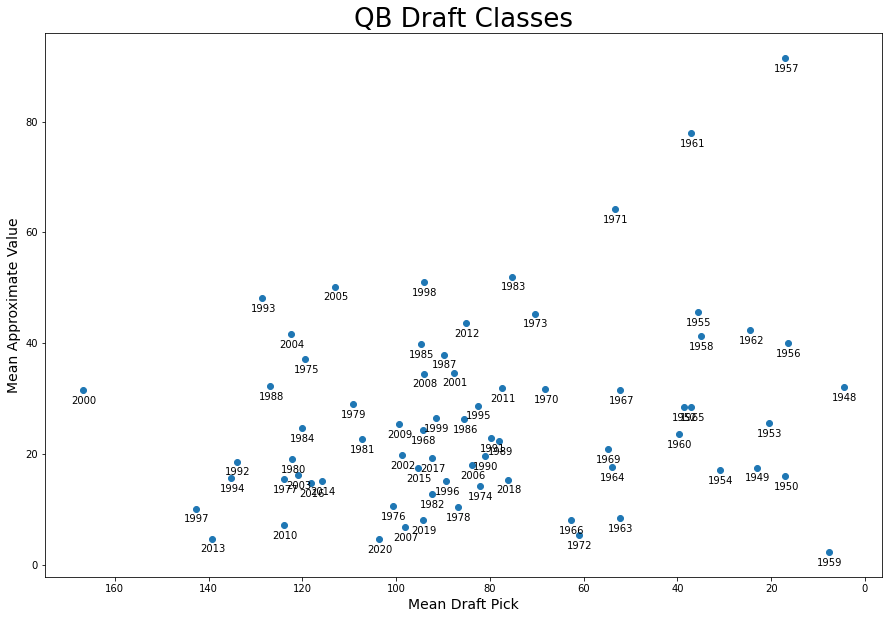

In [440]:
plot = plt.scatter(players_qb['draft_mean'], 
                   players_qb['av_mean'])

ax = plt.gca()
ax.invert_xaxis()

plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel("Mean Draft Pick", fontsize = 14)
plt.ylabel("Mean Approximate Value", fontsize = 14)
plt.title("QB Draft Classes", fontsize = 26)

for num, row in players_qb.iterrows():
#     if ((row['draft_mean'] > 175 and row['av_mean'] < 10) or
#        (row['draft_mean'] < 60 or row['av_mean'] > 35)):
    ax.annotate((str(row['year_drafted'])), 
                (row['draft_mean'], row['av_mean']),
                (row['draft_mean'] + 2.5, row['av_mean'] - 2.5))

plt.savefig('draftclasses_qb.png')

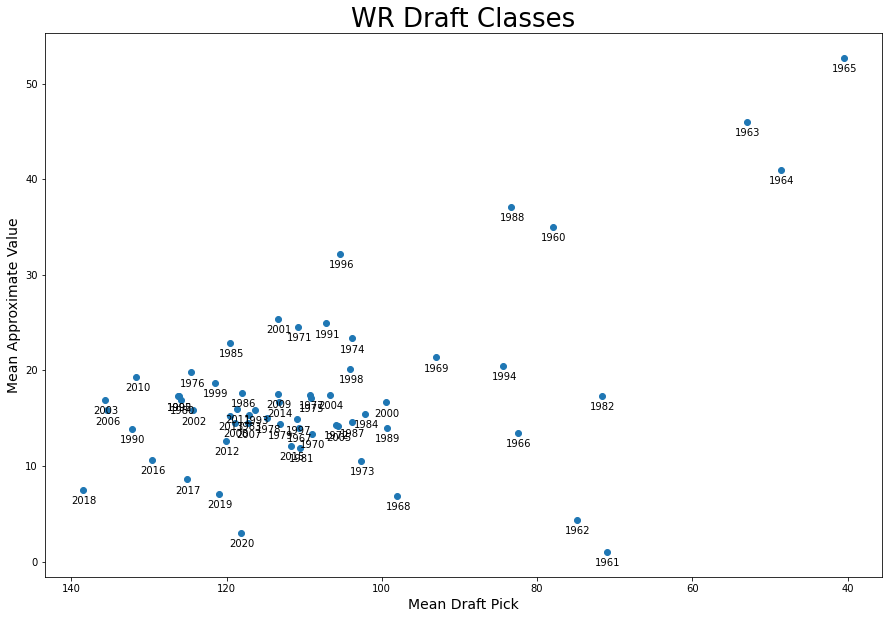

In [446]:
players_wr = players_joined[players_joined['position'] == 'WR']

plot = plt.scatter(players_wr['draft_mean'], 
                   players_wr['av_mean'])

ax = plt.gca()
ax.invert_xaxis()

plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel("Mean Draft Pick", fontsize = 14)
plt.ylabel("Mean Approximate Value", fontsize = 14)
plt.title("WR Draft Classes", fontsize = 26)

for num, row in players_wr.iterrows():
    ax.annotate((str(row['year_drafted'])), 
                (row['draft_mean'], row['av_mean']),
                (row['draft_mean'] + 1.5, row['av_mean'] - 1.5))

plt.savefig('draftclasses_wr.png')

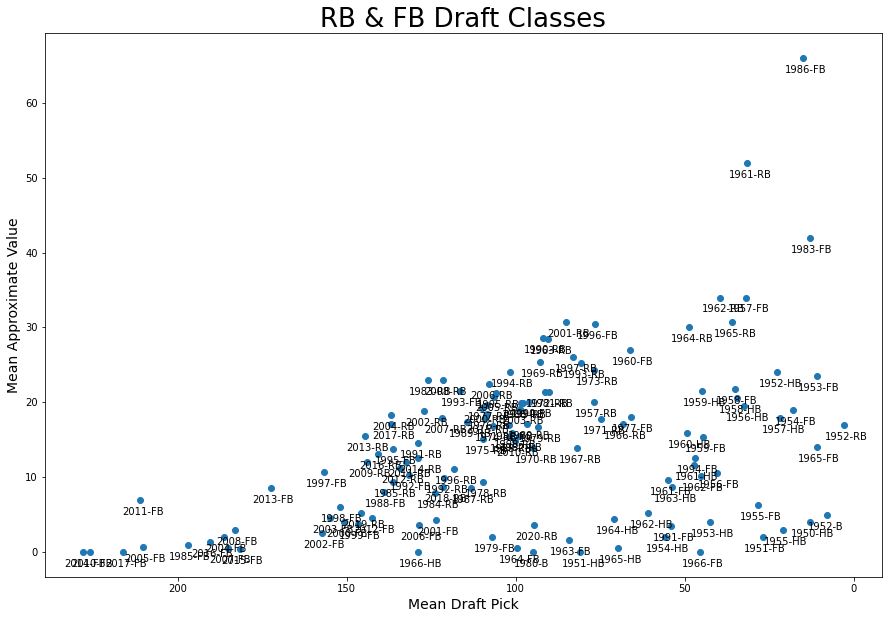

In [474]:
players_backs = players_joined[players_joined['position'].isin(['RB', 'FB', 'B', 'TB', 'HB', 'RH', 'LH'])]

plot = plt.scatter(players_backs['draft_mean'], 
                   players_backs['av_mean'])

ax = plt.gca()
ax.invert_xaxis()

plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel("Mean Draft Pick", fontsize = 14)
plt.ylabel("Mean Approximate Value", fontsize = 14)
plt.title("RB & FB Draft Classes", fontsize = 26)

for num, row in players_backs.iterrows():
    ax.annotate((str(row['year_drafted']) + "-" + row['position']), 
                (row['draft_mean'], row['av_mean']),
                (row['draft_mean'] + 5.5, row['av_mean'] - 2))

plt.savefig('draftclasses_backs.png')

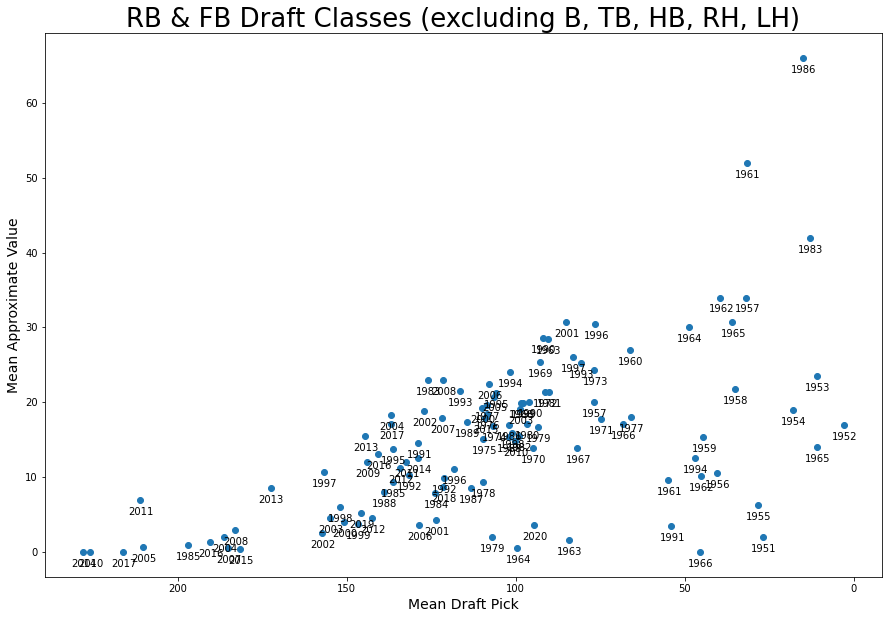

In [460]:
players_backs_rb = players_joined[players_joined['position'].isin(['RB', 'FB'])]

plot = plt.scatter(players_backs_rb['draft_mean'], 
                   players_backs_rb['av_mean'])

ax = plt.gca()
ax.invert_xaxis()

plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel("Mean Draft Pick", fontsize = 14)
plt.ylabel("Mean Approximate Value", fontsize = 14)
plt.title("RB & FB Draft Classes (excluding B, TB, HB, RH, LH)", fontsize = 26)

for num, row in players_backs_rb.iterrows():
    ax.annotate((str(row['year_drafted'])), 
                (row['draft_mean'], row['av_mean']),
                (row['draft_mean'] + 3.5, row['av_mean'] - 2))

plt.savefig('draftclasses_backs_rb_fb.png')

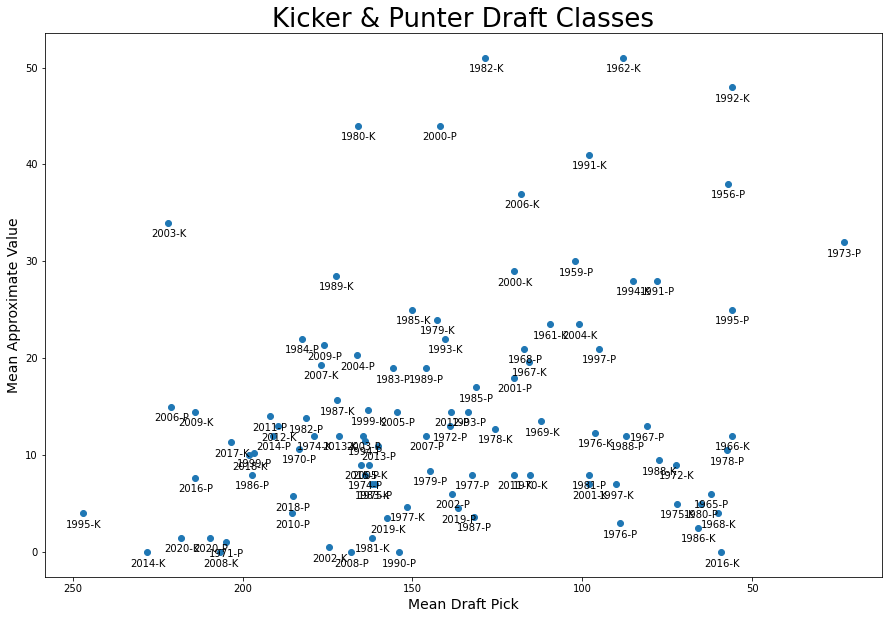

In [479]:
players_kickers = players_joined[players_joined['position'].isin(['K', 'P'])]

plot = plt.scatter(players_kickers['draft_mean'], 
                   players_kickers['av_mean'])

ax = plt.gca()
ax.invert_xaxis()

plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel("Mean Draft Pick", fontsize = 14)
plt.ylabel("Mean Approximate Value", fontsize = 14)
plt.title("Kicker & Punter Draft Classes", fontsize = 26)

for num, row in players_kickers.iterrows():
    ax.annotate((str(row['year_drafted']) + "-" + row['position']), 
                (row['draft_mean'], row['av_mean']),
                (row['draft_mean'] + 5, row['av_mean'] - 1.5))

plt.savefig('draftclasses_kickerspunters.png')

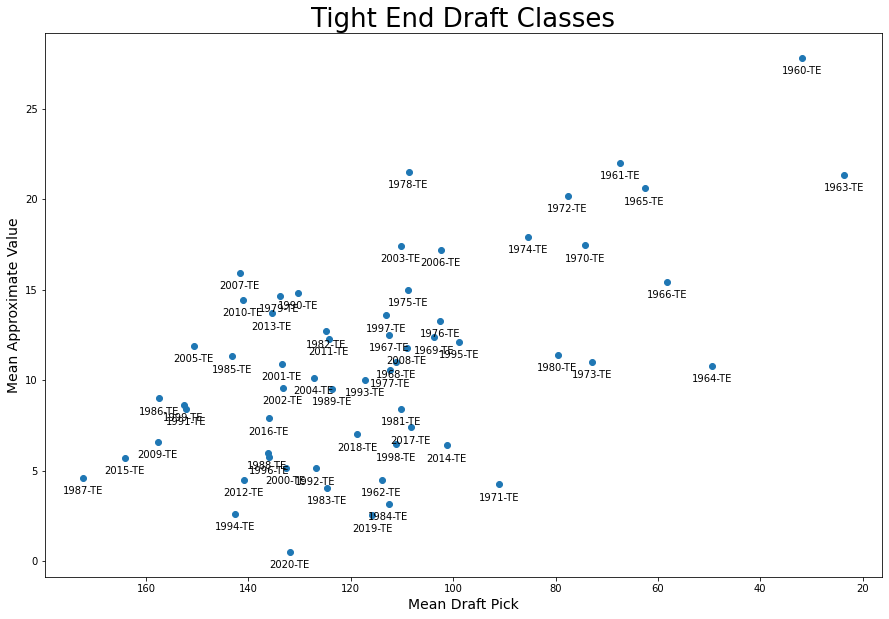

In [483]:
players_te = players_joined[players_joined['position'].isin(['TE'])]

plot = plt.scatter(players_te['draft_mean'], 
                   players_te['av_mean'])

ax = plt.gca()
ax.invert_xaxis()

plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel("Mean Draft Pick", fontsize = 14)
plt.ylabel("Mean Approximate Value", fontsize = 14)
plt.title("Tight End Draft Classes", fontsize = 26)

for num, row in players_te.iterrows():
    ax.annotate((str(row['year_drafted']) + "-" + row['position']), 
                (row['draft_mean'], row['av_mean']),
                (row['draft_mean'] + 4, row['av_mean'] - .9))

plt.savefig('draftclasses_te.png')